In [156]:
#For displaying images in notebook
from IPython.display import Image

This is a quick walkthrough to show examples of how to use the overlap_peak_tables package. We will load some example peak files, overlap them, and try to predict features.

The base bed file (to overlap other features with) we will use is an extract of chr1 rows from the mm10-cCREs.bed from ENCODE (https://screen.encodeproject.org/) that overlap with DNase-accessible regions in mouse embryonic stem cells (https://www.encodeproject.org/files/ENCFF048DWN/) 

In [157]:
!head -5 mm10-cCREs_ESC_chr1.bed

chrom	start	end	element
chr1	3445885	3445980	pELS
chr1	3445980	3446080	pELS
chr1	3670780	3670920	dELS,CTCF-bound
chr1	3671680	3671860	dELS


We will overlap this file with H3K27ac/CTCF peaks from mouse ES cells from ENCODE (https://www.encodeproject.org/)

In [158]:
!head -5 ENCFF194TQD_H3K27ac_chr1.bed

chr1	3062608	3062773
chr1	3982920	3983070
chr1	4150617	4150833
chr1	4784913	4785157
chr1	4785263	4785712


In [159]:
!head -5 ENCFF347BWU_CTCF_chr1.bed

chr1	3909795	3910111
chr1	4142666	4142778
chr1	4228253	4228569
chr1	4297071	4297387
chr1	4332623	4332758


Note that the files need to either be without header or contain at least the headers `chrom`, `start`, and `end`. If you want to perform feature prediction (see later), you need to use column names in the file you're overlapping with.

Let's run the basic overlap command and look at the output

In [160]:
!overlap_peak_tables mm10-cCREs_ESC_chr1.bed \
--overlap_features ENCFF194TQD_H3K27ac_chr1.bed ENCFF347BWU_CTCF_chr1.bed \
--outname mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1 --outdir .

Counting overlaps
Saved overlap table as ./mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1.tsv


In [161]:
!head -5 mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1.tsv | column -t

chrom  start    end      element          ENCFF194TQD_H3K27ac_chr1.bed  ENCFF347BWU_CTCF_chr1.bed
chr1   3445885  3445980  pELS             0                             0
chr1   3445980  3446080  pELS             0                             0
chr1   3670780  3670920  dELS,CTCF-bound  0                             0
chr1   3671680  3671860  dELS             0                             0


We can also count the number of closest peaks within a certain distance

In [164]:
!overlap_peak_tables mm10-cCREs_ESC_chr1.bed \
--overlap_features ENCFF194TQD_H3K27ac_chr1.bed ENCFF347BWU_CTCF_chr1.bed \
--closest --mindist 0 --maxdist 10000 \
--outname mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1_closest --outdir .

Counting the number of peaks within 0 and 10000 bp (up to 100 allowed, change with --k)
Saved overlap table as ./mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1_closest.tsv


Now let's try to do a prediction of the `element` column based on the overlap with H3K27ac/CTCF files. We will use a Random Forest model

In [165]:
!overlap_peak_tables mm10-cCREs_ESC_chr1.bed \
--overlap_features ENCFF194TQD_H3K27ac_chr1.bed ENCFF347BWU_CTCF_chr1.bed \
--predict_column element --model RandomForestClassifier \
--outname mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1 --outdir .

Counting overlaps
Saved overlap table as ./mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1.tsv
Predicting element using RandomForestClassifier
Matthew's correlation coefficient: 0.4261319212006213


Note that you can also run the prediction by itself using your own input tables, like below

In [166]:
!predict_features mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1.tsv \
--predict_column element \
--predictor_columns ENCFF194TQD_H3K27ac_chr1.bed  ENCFF347BWU_CTCF_chr1.bed \
--model RandomForestClassifier \
--outname mm10-cCREs_overlap_H3K27ac_CTCF_chr1 --outdir .

Predicting element using RandomForestClassifier
Matthew's correlation coefficient: 0.4379068997115862


The prediction will output a file with the input columns and a final column with the prediction

In [168]:
!head -5 /exports/igmm/eddie/wendy-lab/elias/test/mm10-cCREs_overlap_H3K27ac_CTCF_TSS_chr1_predict_element_DecisionTreeClassifier.tsv | column -t

chrom  start      end        element               ENCFF194TQD_H3K27ac_chr1.bed  ENCFF347BWU_CTCF_chr1.bed  mm10_TSS_chr1.bed  element_pred
chr1   40802824   40803093   CTCF-only,CTCF-bound  0                             1                          0                  dELS
chr1   140434849  140435129  dELS                  0                             0                          0                  dELS
chr1   128243758  128243909  dELS                  1                             0                          1                  dELS
chr1   36090727   36091068   dELS,CTCF-bound       0                             0                          0                  dELS


Let's have a look at some outputs of the prediction. First of all, the correlation between features 

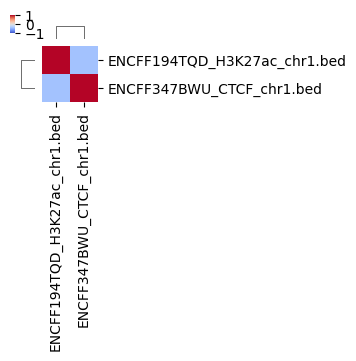

In [169]:
Image('mm10-cCREs_ESC_overlap_H3K27ac_CTCF_chr1_corr_features.png')

We also get a Confusion Matrix showing the True/Predicted types

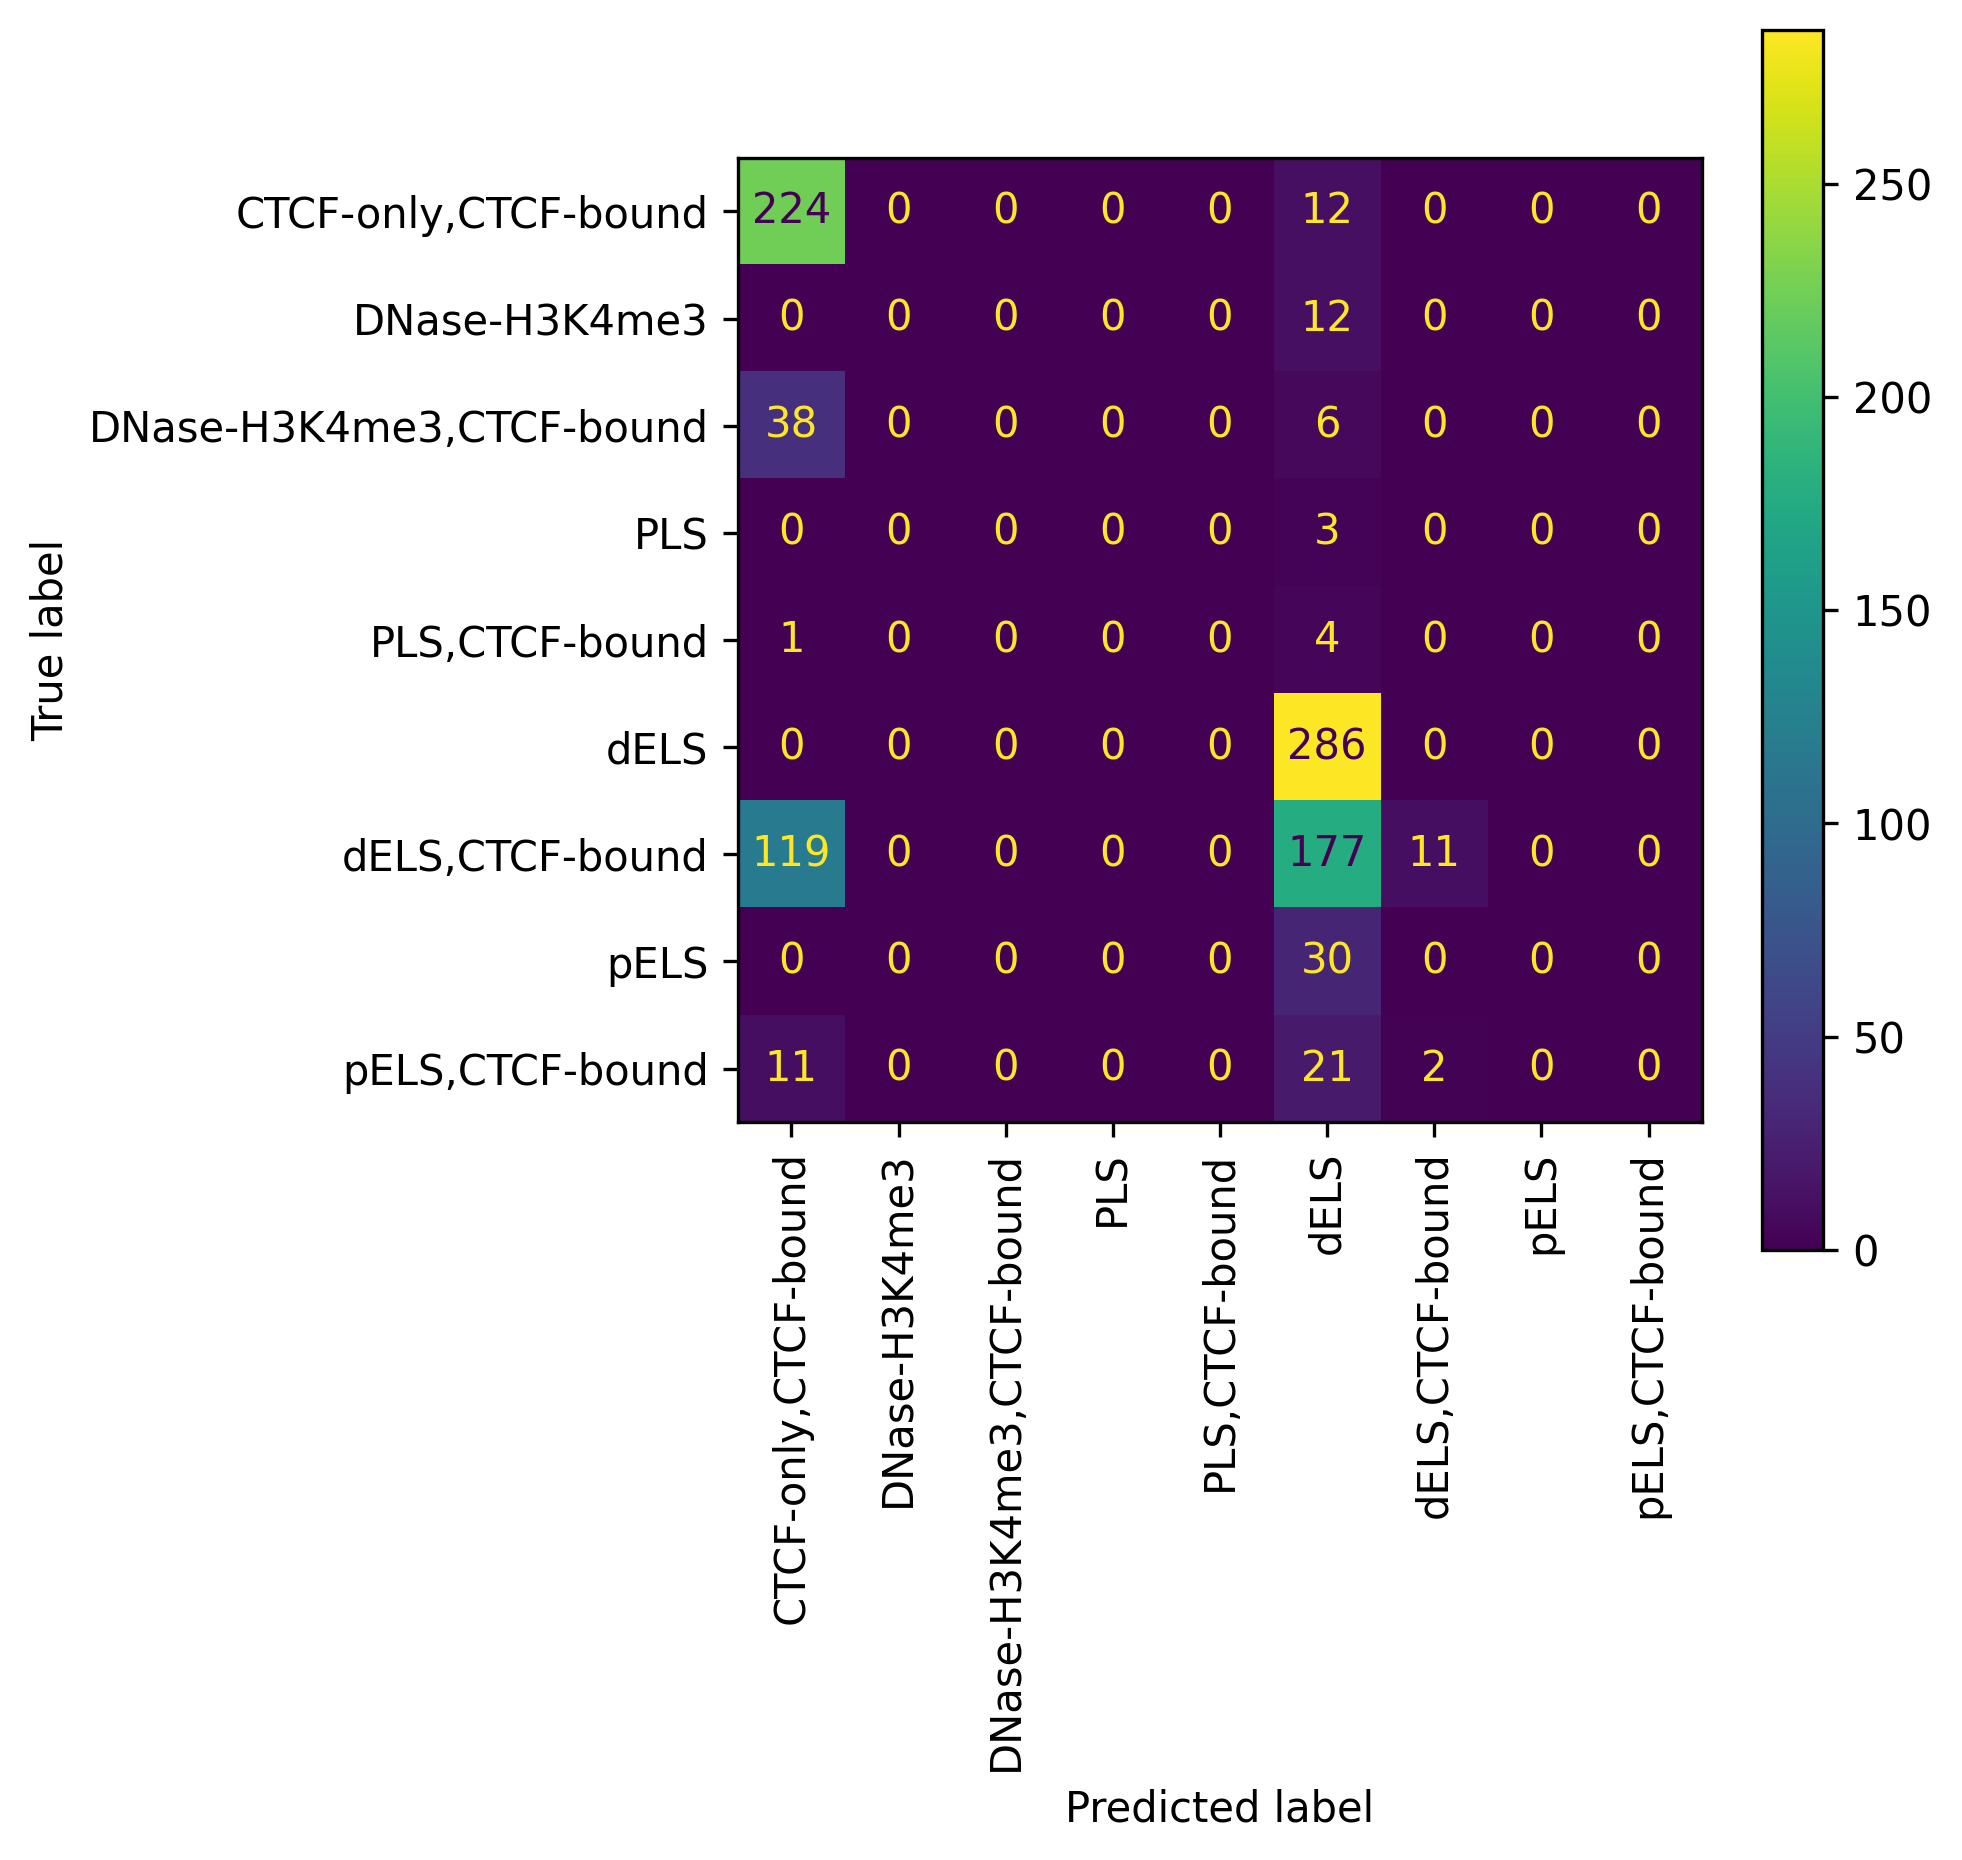

In [171]:
Image('mm10-cCREs_overlap_H3K27ac_CTCF_chr1_confusion_matrix_element_RandomForestClassifier.png')

We can also see see the feature importance used in the model. How this is determined will depend on the model

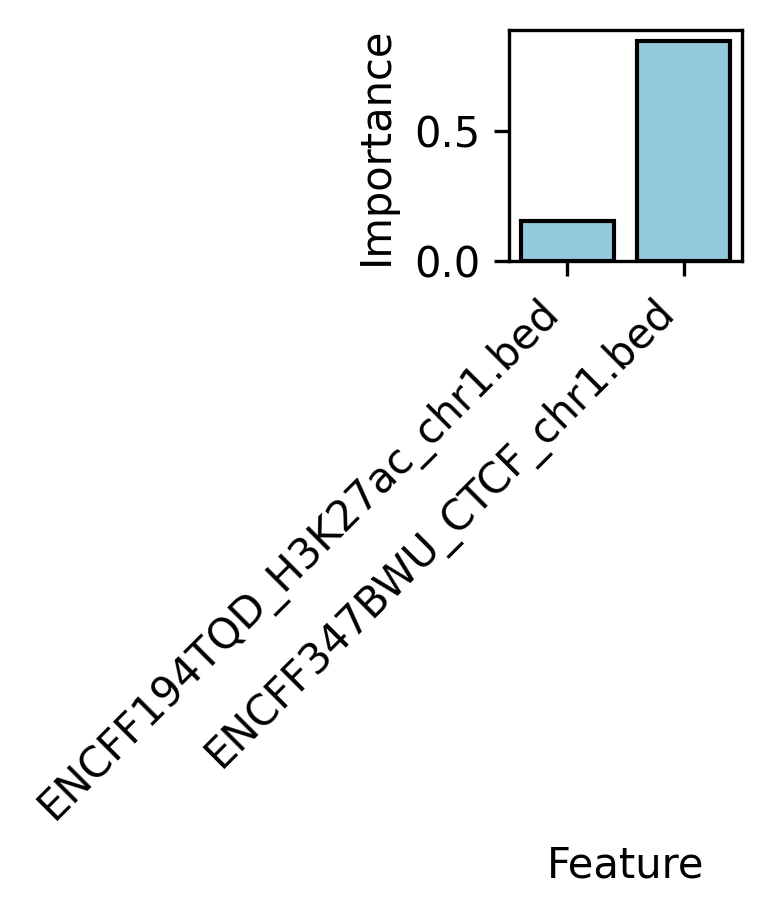

In [172]:
Image('mm10-cCREs_overlap_H3K27ac_CTCF_chr1_RandomForestClassifier_feature_importance.png')